# EDA and Data pre-processing


In [ ]:
import pandas as pd
import seaborn as sns
import io
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving RentDS.csv to RentDS.csv


In [ ]:
df = pd.read_csv("/content/RentDS.csv")

In [ ]:
raw_data = df

In [ ]:
raw_data.head(5)

,Location,Price,No. of rooms,No. of bathrooms,Area,Adress,Colony,Type
0,vistas del cielo 369,120000,4.0,4.0,635.0,El Palomar,Tlajomulco de Zúñiga,House
1,"P.º Solares, Solares Residencial, 45019 Zapopa...",35000,4.0,4.0,147.0,Fraccionamiento Solares,Zapopan,House
2,Paseo Virreyes,35000,3.0,3.0,255.0,Virreyes Residencial,Zapopan,House
3,Paseo San Arturo Poniente,59000,3.0,4.0,349.0,Valle Real,Zapopan,House
4,Liceo 1005,13000,2.0,1.0,50.0,Alcalde Barranquitas,Guadalajara,House


In [ ]:
raw_data.shape

(2000, 8)

Label consistency

In [ ]:
for column in raw_data.keys():
  print("\nColumn name is '{}'".format(column))
  print(raw_data[column].unique())


Column name is 'Location'
['vistas del cielo 369'
 'P.º Solares, Solares Residencial, 45019 Zapopan, Jal.' 'Paseo Virreyes'
 ... 'Justo sierra 2135-84' 'Alarcón 229' 'Av Nicolás Copernico  4225 5']

Column name is 'Price'
[ 120000   35000   59000   13000   31000   22000   34000   28000   55000
   16900   45000   27500   10000   46000  140000  100000  150000   18000
  155000   40000    4500   50000   85000   21000   30000   29000   16500
   47000   13500   17500   27000    9000   23000   75000   14500   25500
   15500   15000   54000   60000    7500   23800    9400   11000   33000
   38000   25000   72000   18500   78000  145000   32500   10200  750000
   80000   68000   29500   38300  110000   12000   13800   42000   22100
   66000  169500   24000   30200   24500   14000   37000   10500   23900
   26000   28500   16000   36000   20000   26650   16300   12200   70000
    8500  131000   18200    7200   26800   10900   26700   19800    7000
   46500   90000   48000  130000   12500   6500

In [ ]:
raw_data.rename(columns={'Colony': 'Municipality'}, inplace=True)
raw_data.rename(columns={'Adress': 'Neighborhood'}, inplace=True)

In [ ]:
column_types = raw_data.dtypes

print(column_types)

Location             object
Price                 int64
No. of rooms        float64
No. of bathrooms    float64
Area                float64
Neighborhood         object
Municipality         object
Type                 object
dtype: object


In [ ]:
raw_data['Municipality'] = raw_data['Municipality'].replace('Jalisco','Other')
raw_data['Municipality'] = raw_data['Municipality'].replace('El Palomar','Tlajomulco de Zúñiga')

Make prices numerical values

In [ ]:
#raw_data['Price'] = raw_data['Price'].str.replace('MXN', '').str.strip().astype(float)

Remove duplicates

In [ ]:
duplicate_rows_raw_data = raw_data[raw_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_raw_data.shape[0])

number of duplicate rows:  71


In [ ]:
duplicate_rows_raw_data.head(5)

,Location,Price,No. of rooms,No. of bathrooms,Area,Neighborhood,Municipality,Type
182,Mar Blanco,26000,4.0,4.0,153.0,Fraccionamiento Lomas Del Country,Guadalajara,House
255,NaN,13000,4.0,2.0,120.0,Real del Sol,Tlajomulco de Zúñiga,House
396,NaN,28000,3.0,2.0,190.0,Las Cañadas,Zapopan,House
400,Paseo de la alianza,48000,4.0,4.0,550.0,Fraccionamiento Valle Imperial,Zapopan,House
437,NaN,18200,4.0,3.0,125.0,Fraccionamiento Real de Valdepeñas,Zapopan,House


In [ ]:
raw_data = raw_data.drop_duplicates()

In [ ]:
duplicate_rows_raw_data = raw_data[raw_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_raw_data.shape[0])

number of duplicate rows:  0


In [ ]:
raw_data.shape

(1929, 8)

Missing values

In [ ]:
print(raw_data.isnull().sum())

Location            404
Price                 0
No. of rooms         23
No. of bathrooms     69
Area                 11
Neighborhood          0
Municipality          0
Type                  0
dtype: int64


In [ ]:
prep_data = raw_data

##Visualization

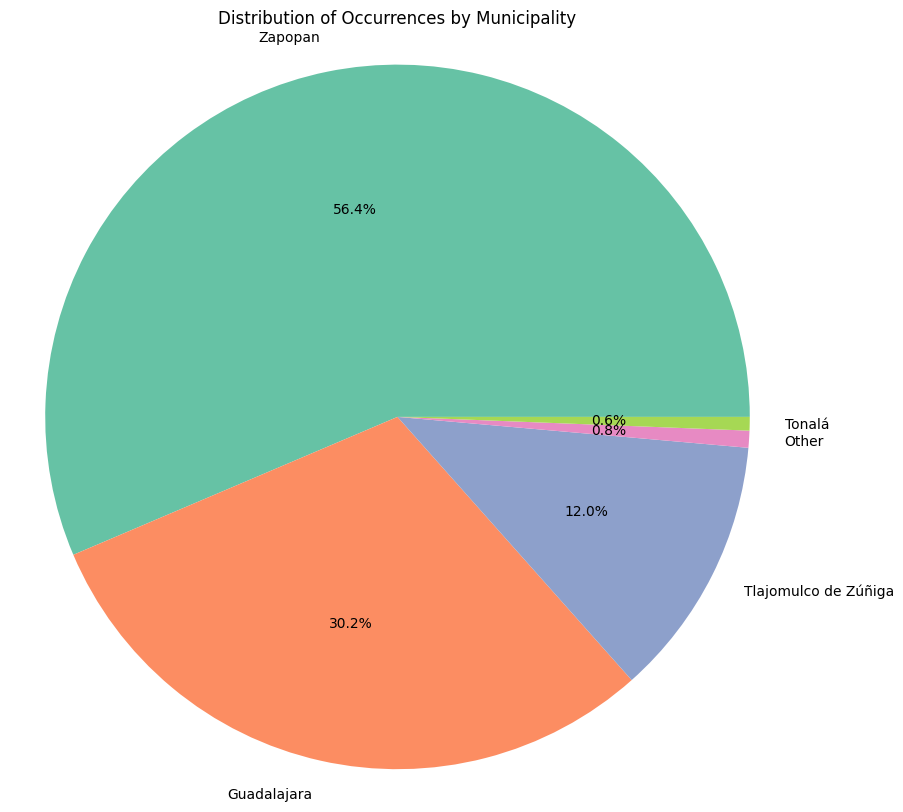

In [ ]:
custom_palette = sns.color_palette("Set2")
plt.figure(figsize=(10, 10))
municipality_counts = prep_data['Municipality'].value_counts()
plt.pie(municipality_counts, labels=municipality_counts.index, autopct='%1.1f%%', colors=custom_palette)
plt.axis('equal')
plt.title('Distribution of Occurrences by Municipality')
plt.rcParams.update({'font.size': 12})
plt.show()

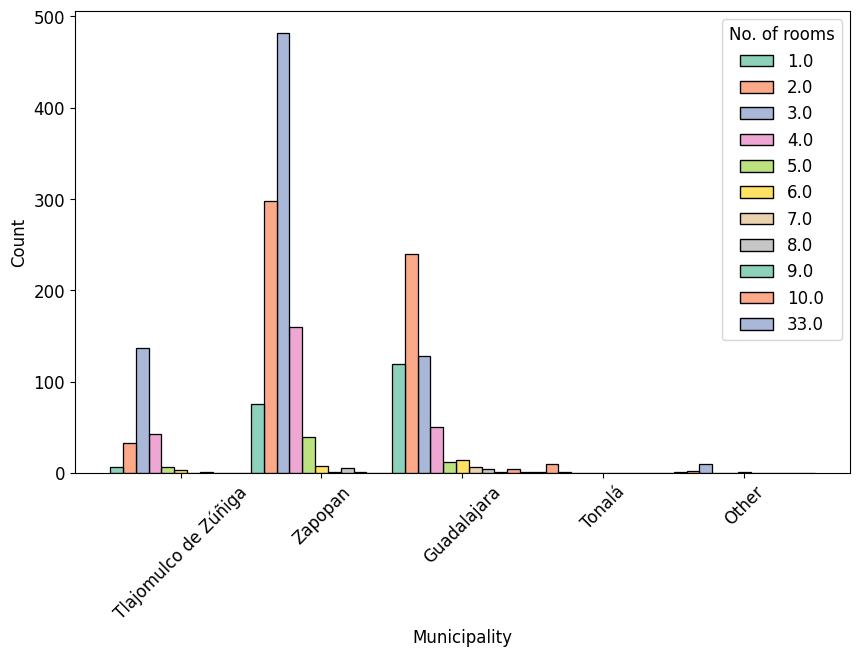

In [ ]:
plt.figure(figsize=(10,6))
custom_palette = "Set2"
sns.histplot(
    data=prep_data,
    x="Municipality",
    hue="No. of rooms",
    multiple="dodge",
    palette=custom_palette)
plt.xticks(rotation=45)
plt.show()

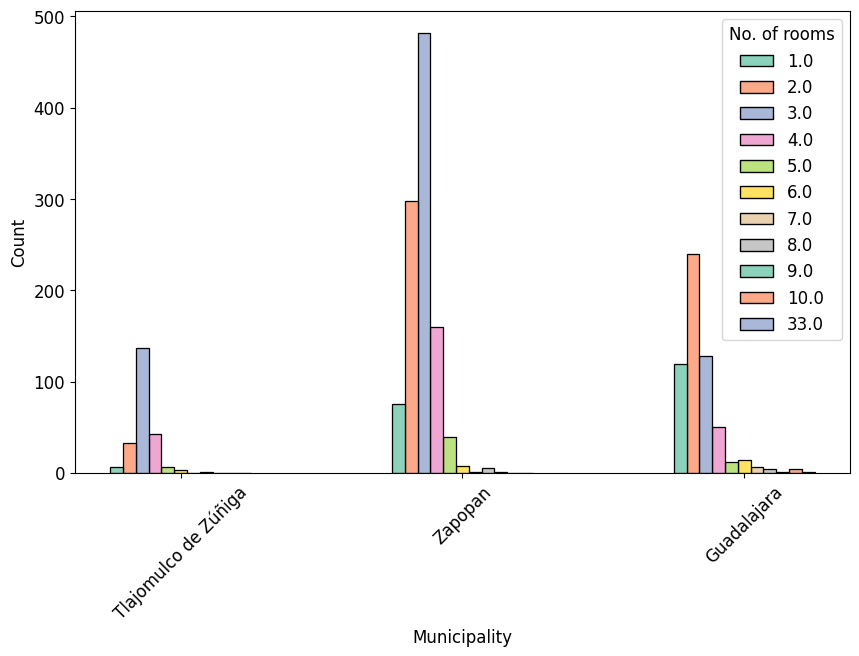

In [ ]:
plt.figure(figsize=(10,6))
selected_municipalities = ["Tlajomulco de Zúñiga", "Zapopan", "Guadalajara"]
filtered_data = prep_data[prep_data['Municipality'].isin(selected_municipalities)]
sns.histplot(
    data=filtered_data,
    x="Municipality",
    hue="No. of rooms",
    multiple="dodge",
    palette=custom_palette,
    shrink=0.5
)
plt.xticks(rotation=45)
plt.show()

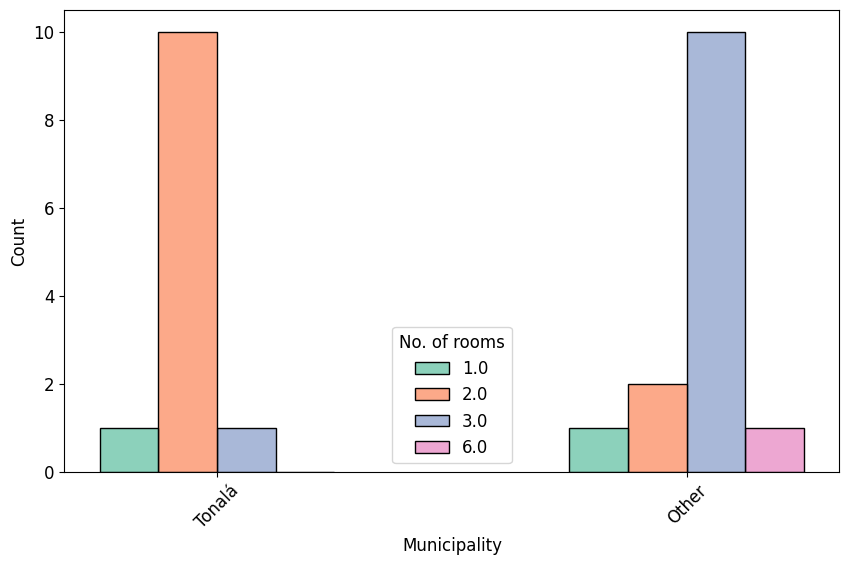

In [ ]:
plt.figure(figsize=(10,6))
selected_municipalities = ["El Palomar", "Tonalá", "Other"]
filtered_data = prep_data[prep_data['Municipality'].isin(selected_municipalities)]
sns.histplot(
    data=filtered_data,
    x="Municipality",
    hue="No. of rooms",
    multiple="dodge",
    palette=custom_palette,
    shrink=0.5
)
plt.xticks(rotation=45)
plt.show()

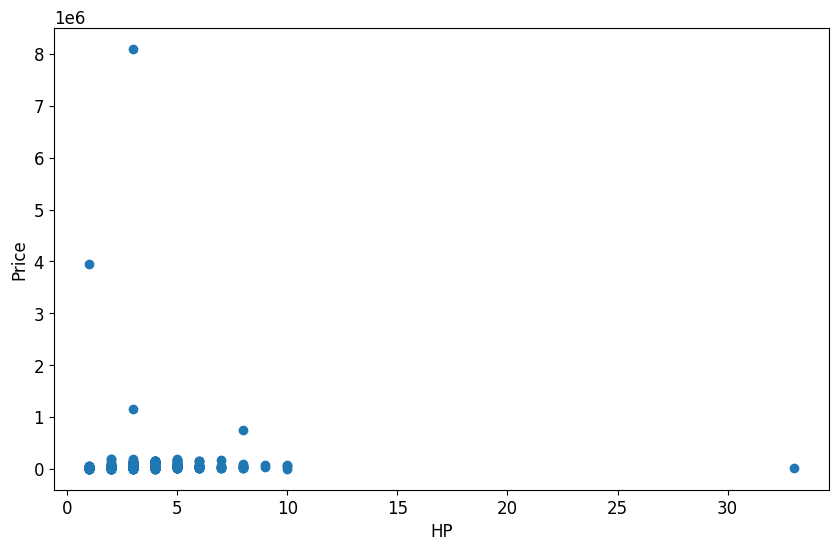

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(prep_data['No. of rooms'], prep_data['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

Remove Outliers



In [ ]:
def remove_outliers(df, column_name):
  """
  Función que remueve outliers por 1.5 veces IQR
  Arguments:
  df - DataFrame
  column_name - A string that corresponds to a column name of df
  * La columna debe ser numérica
  Regresa la data frame sin outliers
  """
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  df = df[df[column_name]>=lower_limit]
  df = df[df[column_name]<=upper_limit]

  print(lower_limit, upper_limit)
  return df

In [ ]:
data = prep_data
data = remove_outliers(data, "Price")
data = remove_outliers(data, "No. of rooms")
data = data[data['Area'] >= 12]
data = data[data['Area'] <= 307.5]

-11500.0 64500.0
0.5 4.5


In [ ]:
prep_data.shape

(1929, 8)

In [ ]:
data.shape

(1526, 8)

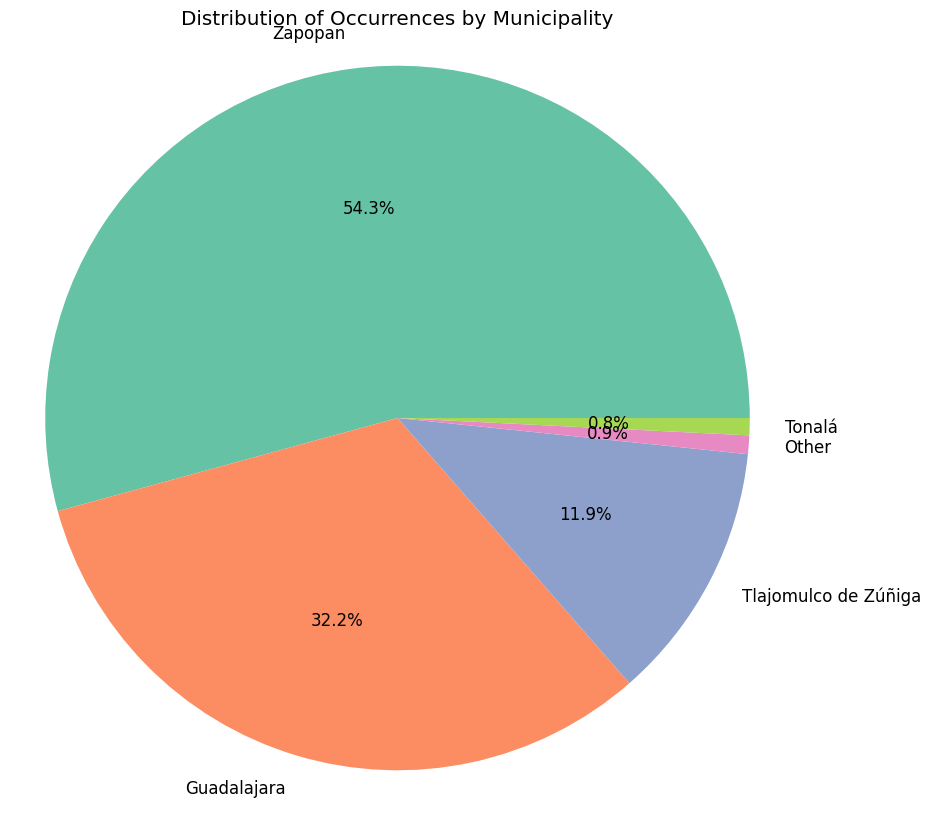

In [ ]:
custom_palette = sns.color_palette("Set2")
plt.figure(figsize=(10, 10))
municipality_counts = data['Municipality'].value_counts()
plt.pie(municipality_counts, labels=municipality_counts.index, autopct='%1.1f%%', colors=custom_palette)
plt.axis('equal')
plt.title('Distribution of Occurrences by Municipality')
plt.rcParams.update({'font.size': 12})
plt.show()

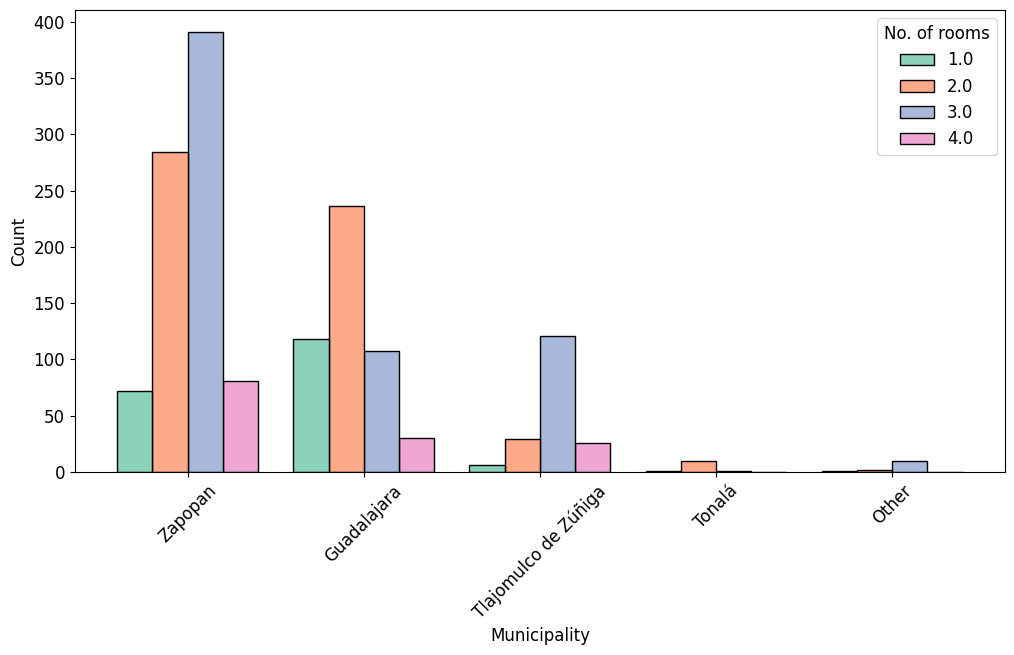

In [ ]:
plt.figure(figsize=(12,6))
custom_palette = "Set2"
sns.histplot(
    data=data,
    x="Municipality",
    hue="No. of rooms",
    multiple="dodge",
    palette=custom_palette,
    shrink=0.8
    )
plt.xticks(rotation=45)
plt.show()

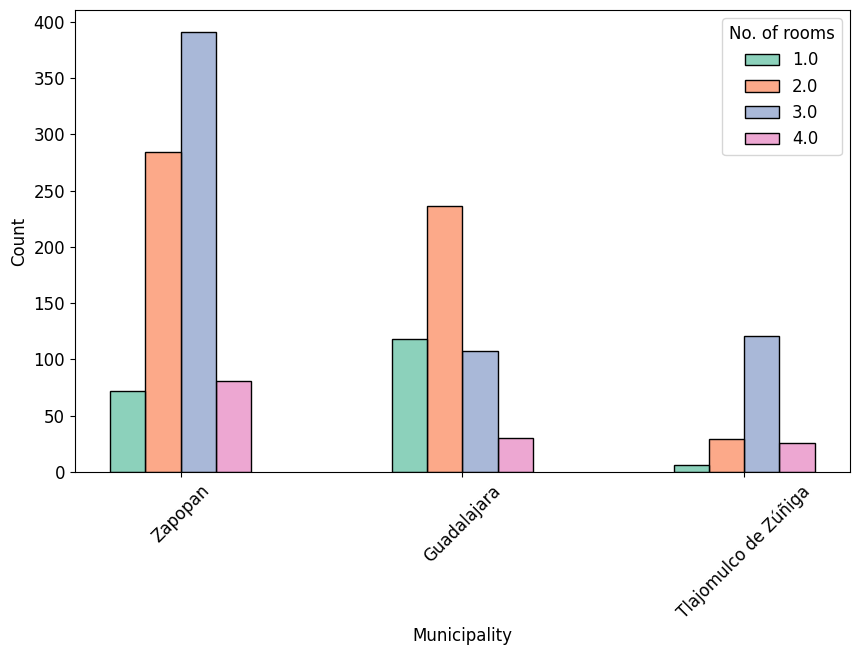

In [ ]:
plt.figure(figsize=(10,6))
selected_municipalities = ["Tlajomulco de Zúñiga", "Zapopan", "Guadalajara"]
filtered_data = data[data['Municipality'].isin(selected_municipalities)]
sns.histplot(
    data=filtered_data,
    x="Municipality",
    hue="No. of rooms",
    multiple="dodge",
    palette=custom_palette,
    shrink=0.5
)
plt.xticks(rotation=45)
plt.show()

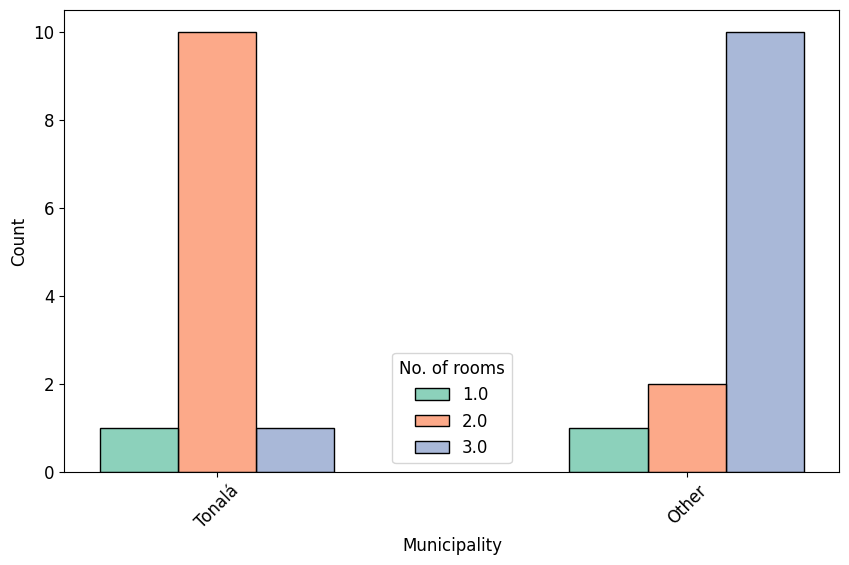

In [ ]:
plt.figure(figsize=(10,6))
selected_municipalities = ["El Palomar", "Tonalá", "Other"]
filtered_data = data[data['Municipality'].isin(selected_municipalities)]
sns.histplot(
    data=filtered_data,
    x="Municipality",
    hue="No. of rooms",
    multiple="dodge",
    palette=custom_palette,
    shrink=0.5
)
plt.xticks(rotation=45)
plt.show()

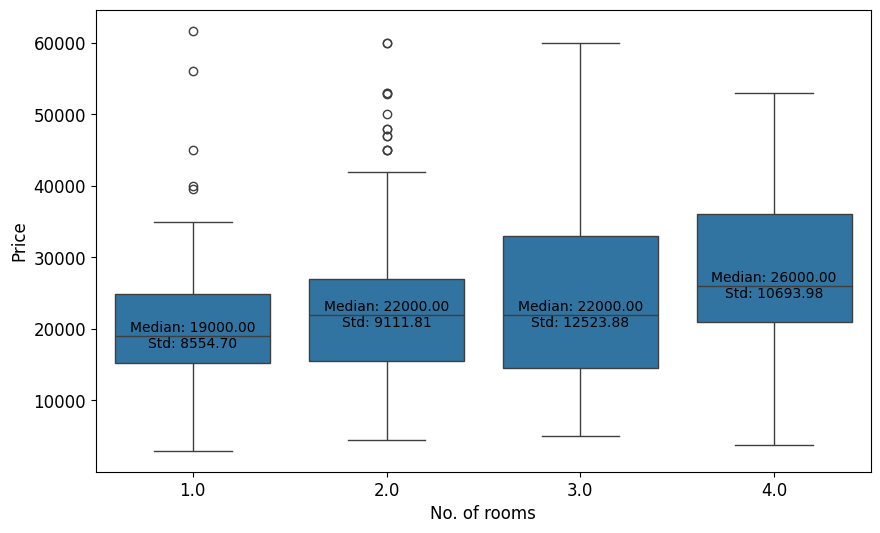

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='No. of rooms', y='Price')
group_stats = data.groupby('No. of rooms')['Price'].agg(['median', 'std',])
for i, (mean, std) in enumerate(zip(group_stats['median'], group_stats['std'])):
    plt.text(i, mean, f'Median: {mean:.2f}\nStd: {std:.2f}', ha='center', va='center', color='black', fontsize=10)
plt.xlabel('No. of rooms')
plt.ylabel('Price')
plt.show()

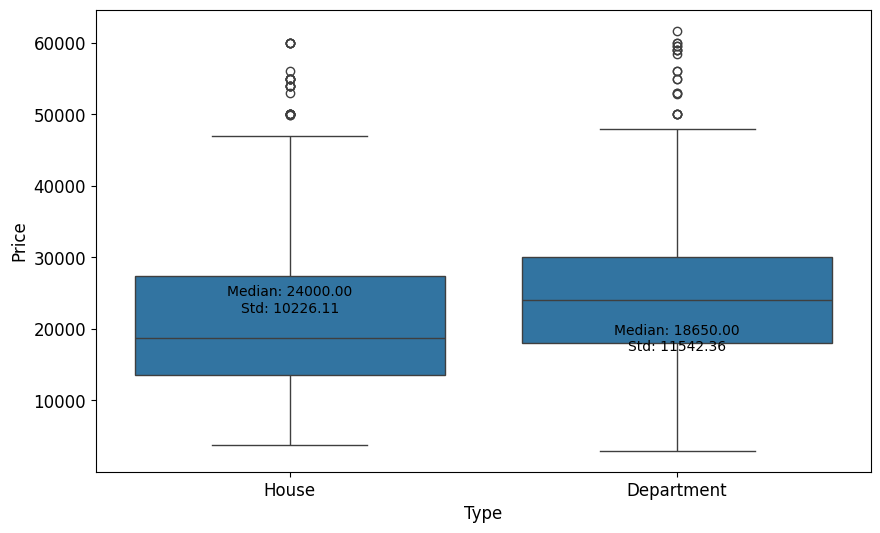

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Type', y='Price')
group_stats = data.groupby('Type')['Price'].agg(['median', 'std',])
for i, (mean, std) in enumerate(zip(group_stats['median'], group_stats['std'])):
    plt.text(i, mean, f'Median: {mean:.2f}\nStd: {std:.2f}', ha='center', va='center', color='black', fontsize=10)
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

## Feature engineering

In [ ]:
proces_data = data

Missing values interpolation

In [ ]:
# Sort the DataFrame by the 'Area' column
proces_data = proces_data.sort_values(by='Area')

# Interpolate missing values for 'No. of bathrooms' and 'No. of rooms'
proces_data['No. of bathrooms'] = proces_data['No. of bathrooms'].interpolate(method='linear', limit_direction='both').apply(np.floor)
proces_data['No. of rooms'] = proces_data['No. of rooms'].interpolate(method='linear', limit_direction='both').apply(np.floor)

# Fill any remaining missing values at the beginning or end of the DataFrame with the first or last available value
proces_data['No. of bathrooms'] = proces_data['No. of bathrooms'].fillna(method='bfill')
proces_data['No. of rooms'] = proces_data['No. of rooms'].fillna(method='bfill')

# If there are still missing values at the beginning or end, fill them with the first or last available value
proces_data['No. of bathrooms'] = proces_data['No. of bathrooms'].fillna(method='ffill')
proces_data['No. of rooms'] = proces_data['No. of rooms'].fillna(method='ffill')

# Reset index if needed
proces_data.reset_index(drop=True, inplace=True)


In [ ]:
proces_data.shape

(1526, 8)

price by squared meter

In [ ]:
proces_data['Price per sq meter'] = proces_data['Price'] / proces_data['Area']

Bathrooms per room index

In [ ]:
proces_data['Bathrooms per room'] = proces_data['No. of bathrooms'] / proces_data['No. of rooms']

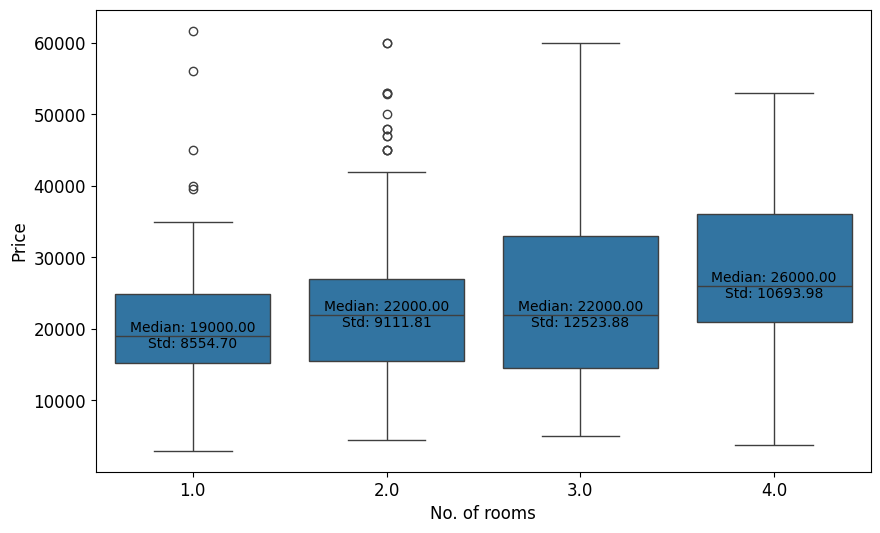

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=proces_data, x='No. of rooms', y='Price')
group_stats = proces_data.groupby('No. of rooms')['Price'].agg(['median', 'std',])
for i, (mean, std) in enumerate(zip(group_stats['median'], group_stats['std'])):
    plt.text(i, mean, f'Median: {mean:.2f}\nStd: {std:.2f}', ha='center', va='center', color='black', fontsize=10)
plt.xlabel('No. of rooms')
plt.ylabel('Price')
plt.show()

In [ ]:
proces_data.head(1000)

,Location,Price,No. of rooms,No. of bathrooms,Area,Neighborhood,Municipality,Type,Price per sq meter,Bathrooms per room
0,Calle Miguel de Cervantes Saavedra 382A,5310,1.0,1.0,12.0,Obrera,Guadalajara,Department,442.500000,1.000000
1,"Legacy Tower, Av Empresarios 62",5310,1.0,1.0,12.0,Obrera,Guadalajara,Department,442.500000,1.000000
2,NaN,2950,1.0,1.0,20.0,El Mante,Zapopan,Department,147.500000,1.000000
3,Punto Sur,2950,1.0,2.0,20.0,El Mante,Zapopan,Department,147.500000,2.000000
4,Arquitectos Norte 855,4930,1.0,1.0,25.0,Jardines Tepeyac,Zapopan,Department,197.200000,1.000000
...,...,...,...,...,...,...,...,...,...,...
995,NaN,23900,3.0,2.0,137.0,Juan Manuel Vallarta,Zapopan,Department,174.452555,0.666667
996,NaN,25000,2.0,2.0,138.0,Monraz,Guadalajara,Department,181.159420,1.000000
997,CHAPULTEPEC 480,27500,2.0,2.0,138.0,Americana,Guadalajara,Department,199.275362,1.000000
998,NaN,32000,3.0,2.0,138.0,Providencia,Guadalajara,Department,231.884058,0.666667


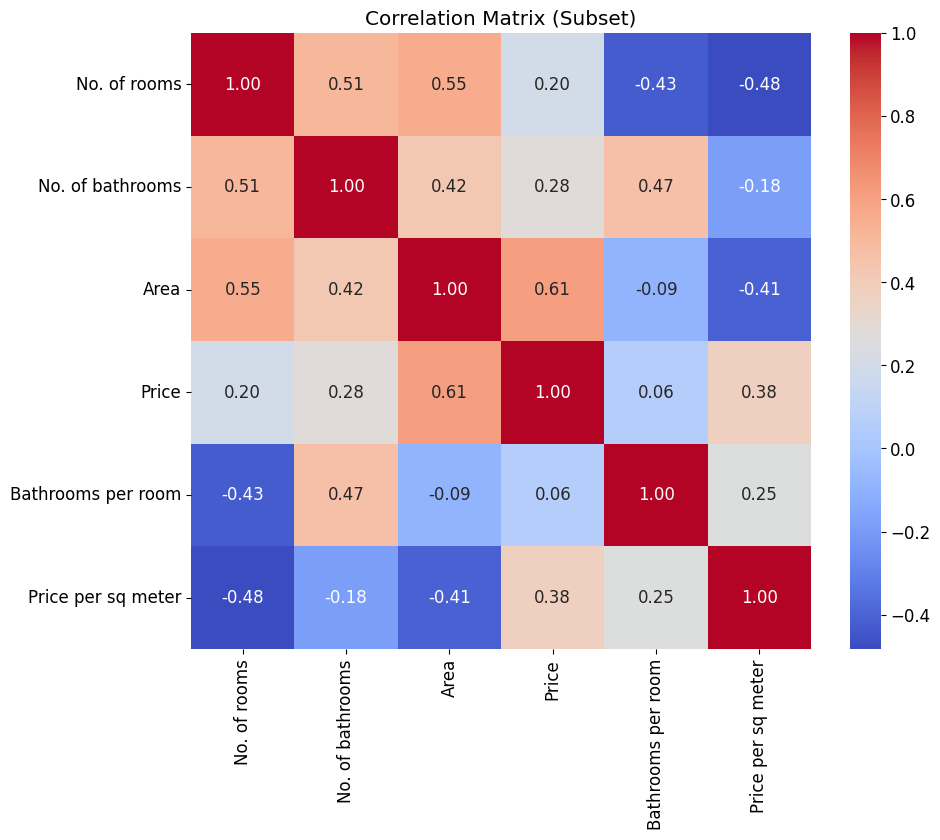

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Your included features
included_features = ['No. of rooms', 'No. of bathrooms', 'Area', 'Price',
                     'Bathrooms per room', 'Price per sq meter']

# Select the subset of data with included features
subset_data = proces_data[included_features]

# Compute the correlation matrix
correlation_matrix = subset_data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Subset)')
plt.show()


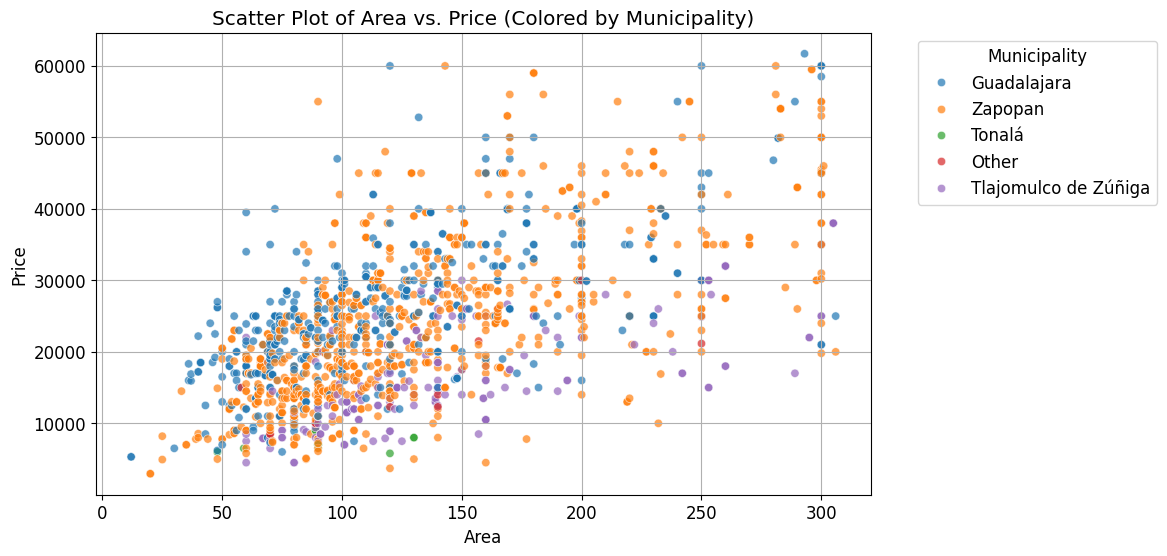

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', hue='Municipality', data=proces_data, alpha=0.7)
plt.title('Scatter Plot of Area vs. Price (Colored by Municipality)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.legend(title='Municipality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

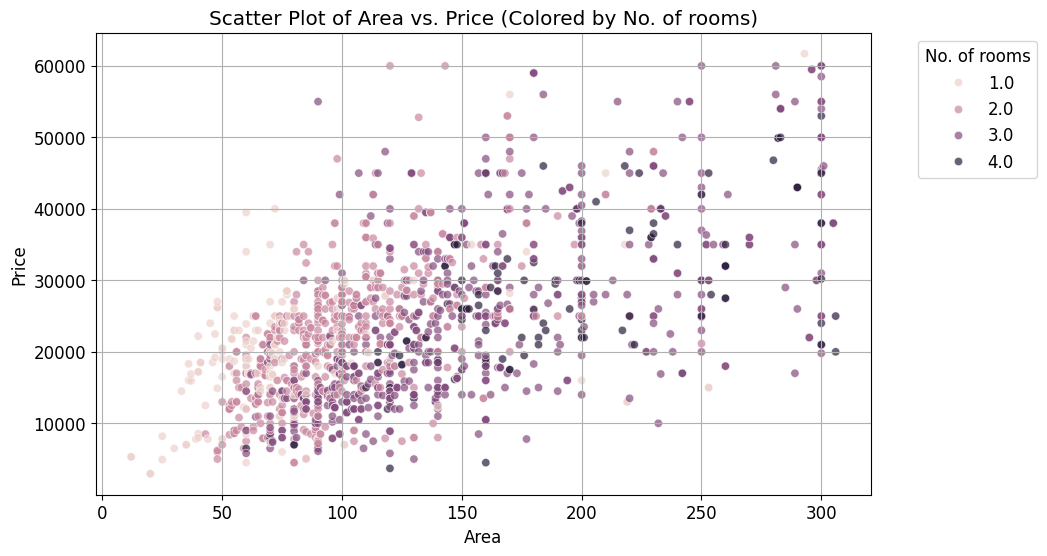

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', hue='No. of rooms', data=proces_data, alpha=0.7)
plt.title('Scatter Plot of Area vs. Price (Colored by No. of rooms)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.legend(title='No. of rooms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()